# Exercises
**Do your work for this exercise in a notebook named modeling within your clustering-exercises repository.**
____

## 1.  Clustering with the Iris Dataset
##### Using this lesson as a guide, perform clustering on the `iris` dataset.
- 1a. Choose features other than the ones used in the lesson.
- 1b. Visualize the results of your clustering.
- 1c. Use the elbow method to visually select a good value for k.
- 1d. Repeat the clustering, this time with 3 different features.

## 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

## 3. How does scaling impact the results of clustering?

### Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

**Bonus**
- a) Read in the data from this google sheet: https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing
- b) Visualize the data and guess the number and shape of the clusters.
- c) Implement the KMeans algorithm on unscaled data and visualize the clusters.
- d) Repeat the step above but with scaled data.
- c) Write down the takeaways from this exercise.




### Imports:

In [26]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# custom visuals for this lesson
# import viz_kmeans

# supress scientific notation
np.set_printoptions(suppress=True)

from sklearn.cluster import KMeans

# ~ 1a. ~

In [27]:
# SKlearn implementation
from pydataset import data

# import data
iris = data('iris')
iris.head()

# rename columns

iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


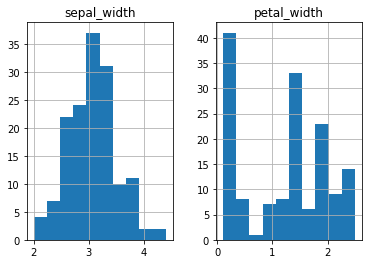

In [28]:
# define independent variables for k-means

X = iris[['sepal_width', 'petal_width']]
X.head()

X.hist();

In [29]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

X_scaled.head()

,sepal_width,petal_width
1,1.019004,-1.315444
2,-0.131979,-1.315444
3,0.328414,-1.315444
4,0.098217,-1.315444
5,1.249201,-1.315444


In [30]:
# sklearn implementation of KMeans

# define the thing
kmeans = KMeans(n_clusters=3, random_state = 123)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1], dtype=int32)

In [31]:
# make a new column names cluster in iris and X_scaled dataframe

iris['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

# look at sample of 15 randomly selected rows in iris dataset

iris.sample(15)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
134,6.3,2.8,5.1,1.5,virginica,2
127,6.2,2.8,4.8,1.8,virginica,1
96,5.7,3.0,4.2,1.2,versicolor,2
73,6.3,2.5,4.9,1.5,versicolor,2
108,7.3,2.9,6.3,1.8,virginica,1
88,6.3,2.3,4.4,1.3,versicolor,2
121,6.9,3.2,5.7,2.3,virginica,1
51,7.0,3.2,4.7,1.4,versicolor,1
64,6.1,2.9,4.7,1.4,versicolor,2
53,6.9,3.1,4.9,1.5,versicolor,1


### Attributes for Kmeans : 

- cluster_centers_: The center point of each cluster (aka centroids).

- labels_: The labels for each observation.

- inertia_: Sum of squared distances of samples to their closest cluster center.

In [50]:
# Cluster Centers aka centroids

kmeans.cluster_centers_

# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

# Centriods for unscaled data?
centroids = iris.groupby('cluster')['sepal_width', 'petal_width'].mean()

# How to get unscaled centroids?

scaler.inverse_transform(kmeans.cluster_centers_)

# Labels (same as from predict)

kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

# ~ 1b. ~

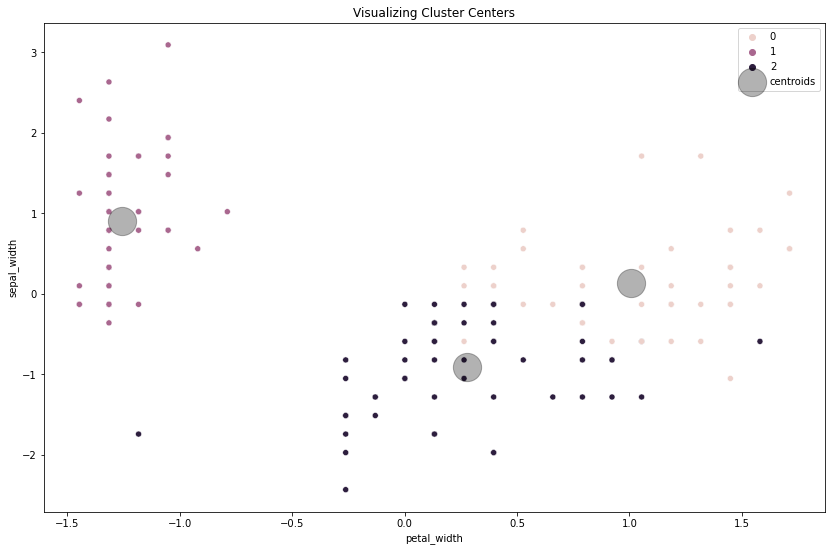

In [51]:
# visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'petal_width', y ='sepal_width', data = X_scaled, hue = 'cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'petal_width', y = 'sepal_width',
                             ax = plt.gca(),
                             s= 800,
                             color = 'k',
                             alpha = 0.3,
                             label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

In [34]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,0
2,4.9,3.0,1.4,0.2,setosa,0
3,4.7,3.2,1.3,0.2,setosa,0
4,4.6,3.1,1.5,0.2,setosa,0
5,5.0,3.6,1.4,0.2,setosa,0


In [35]:
# to avoid Seaborn 'hue' issue with integers, Ravinder changes the cluster columns from integer to string:
iris['cluster'] = 'cluster_' + iris.cluster.astype(str)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,cluster_0
2,4.9,3.0,1.4,0.2,setosa,cluster_0
3,4.7,3.2,1.3,0.2,setosa,cluster_0
4,4.6,3.1,1.5,0.2,setosa,cluster_0
5,5.0,3.6,1.4,0.2,setosa,cluster_0


## How to choose 'k'

#### A-*priori* knowledge about application domain/educated guess
-  How many five different types of bacteria in the world (k = 5)
- There are two different kinds of people in world (k = 2)

#### Search for a 'good' k value
- Try different k values and evaluate results
    - Inertia = sum of squared distances from each point to it's assigned centroid  
    - minimize inertia(?)
    - Use elbow method (using inertia) to choose k

#### Use hierarchical clustering
- Try on a subset of data and guess k

# ~ 1c. ~

In [37]:
kmeans.inertia_

79.24744370877896

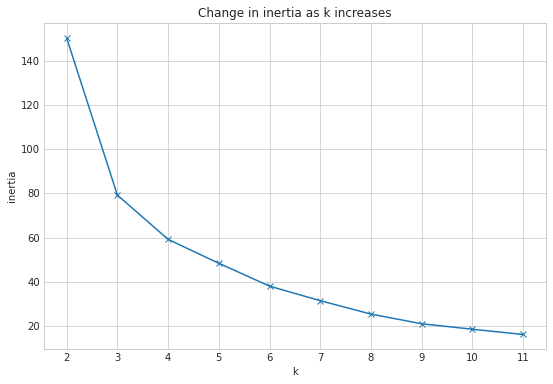

In [38]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

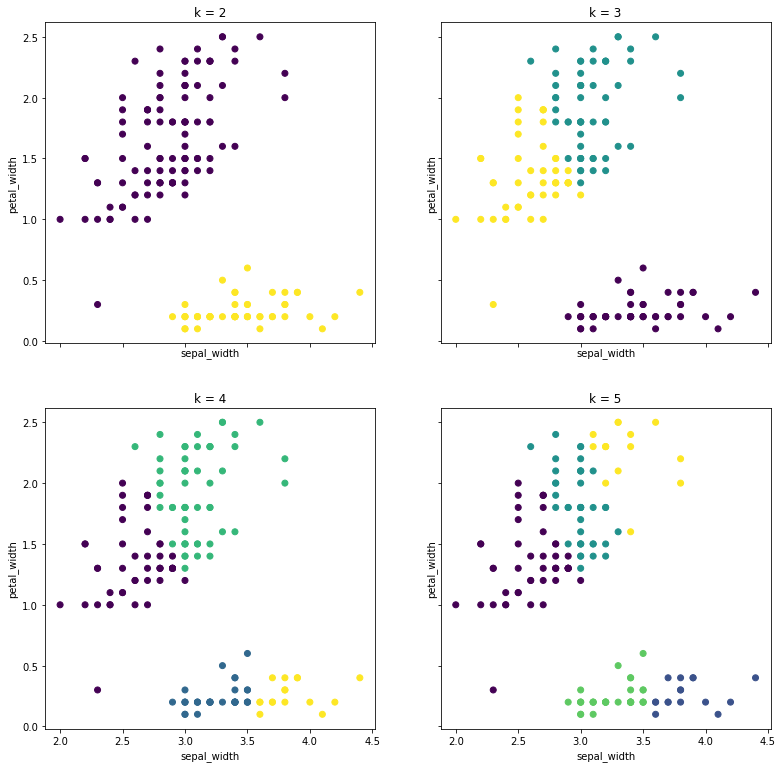

In [43]:
# another way

fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.sepal_width, X.petal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal_width', ylabel='petal_width')

# ~ 1d. ~

In [54]:
# SKlearn implementation
from pydataset import data

# import data
iris = data('iris')
iris.head()

# rename columns

iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


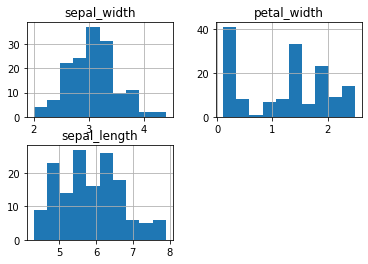

In [55]:
# define independent variables for k-means

X = iris[['sepal_width', 'petal_width', 'sepal_length']]
X.head()

X.hist();

In [56]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

X_scaled.head()

,sepal_width,petal_width,sepal_length
1,1.019004,-1.315444,-0.900681
2,-0.131979,-1.315444,-1.143017
3,0.328414,-1.315444,-1.385353
4,0.098217,-1.315444,-1.506521
5,1.249201,-1.315444,-1.021849


In [57]:
# sklearn implementation of KMeans

# define the thing
kmeans = KMeans(n_clusters=3, random_state = 123)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [58]:
# make a new column names cluster in iris and X_scaled dataframe

iris['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

# look at sample of 15 randomly selected rows in iris dataset

iris.sample(15)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
49,5.3,3.7,1.5,0.2,setosa,1
52,6.4,3.2,4.5,1.5,versicolor,0
73,6.3,2.5,4.9,1.5,versicolor,2
86,6.0,3.4,4.5,1.6,versicolor,0
15,5.8,4.0,1.2,0.2,setosa,1
119,7.7,2.6,6.9,2.3,virginica,0
31,4.8,3.1,1.6,0.2,setosa,1
102,5.8,2.7,5.1,1.9,virginica,2
14,4.3,3.0,1.1,0.1,setosa,1
128,6.1,3.0,4.9,1.8,virginica,0


In [59]:
# Cluster Centers aka centroids

kmeans.cluster_centers_

# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

# Centriods for unscaled data?
centroids = iris.groupby('cluster')['sepal_width', 'petal_width', 'sepal_length'].mean()

# How to get unscaled centroids?

scaler.inverse_transform(kmeans.cluster_centers_)

# Labels (same as from predict)

kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

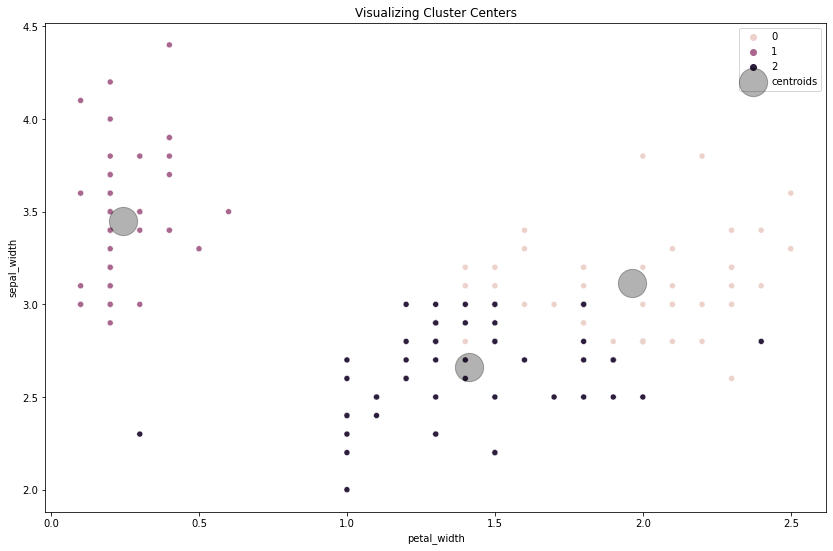

In [62]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'petal_width', y ='sepal_width', data = iris, hue = 'cluster')


# plot cluster centers (centroids)
centroids.plot.scatter(x = 'petal_width', y = 'sepal_width',
                             ax = plt.gca(),
                             s= 800,
                             color = 'k',
                             alpha = 0.3,
                             label = 'centroids')
plt.title('Visualizing Cluster Centers')
plt.legend();

# ~ 2. ~

In [63]:
import env
# build a simple query:
db_name = "mall_customers"
query = 'SELECT * FROM customers'

url  = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/{db_name}'
df = pd.read_sql(query, url, index_col="customer_id")

# Encode gender
df.gender = df.gender.apply(lambda x: 1 if x == "Female" else 0)

# Split nice and early
train_validate, test = train_test_split(df, train_size=.80, random_state=123)
train, validate = train_test_split(train_validate, random_state=123)

train.shape, validate.shape, test.shape

train.head()

NameError: name 'train_test_split' is not defined